# Project 2: Evolutionary Computing

### Student: Eduardo S. Ito (RA 159086)
### Student: Thales E. Nazatto (RA 074388)

### Code: https://github.com/edbkei/MO416PROJ2

# 1. Introdução

<p>Conforme referência <strong>[1]</strong>, o problema da mochila (<i>knapsack problem</i>) é um problema de otimização combinatória, cujo objetivo é preencher uma mochila com o maior valor possível de itens considerando seus pesos e valores, não excedendo a capacidade máxima e sendo ilustrado na figura abaixo. A formulação do problema é extremamente simples, porém a solução é mais complexa. Fez parte dos 21 problemas NP-completos de Richard Karp, sendo divulgado em 1972 e foi a base do primeiro algoritmo de chave pública (criptografia assimétrica).</p>
    
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/800px-Knapsack.svg.png"/ height="520" width="390"></center>
    
<p>Este relatório tem como objetivo mostrar como seria a resolução deste problema usando modelos evolucionários. Detalhes sobre a resolução e modelagem do problema estão na seção 2, experimentos e seus resultados estão na seção 3 e suas conclusões estão na seção 4.</p>

# 2. Implementação e modelagem

## 2.1. Detalhes da implementação

### 2.1.1. Divisão do Algoritmo

<p>Normalmente este problema é resolvido com programação dinâmica, obtendo então a resolução exata do problema, mas também é possível usar modelos evolucionários para encontrar o modelo. O modelo evolucionário adotado será o <strong>Algoritmo Genético (GA).</strong>.<p>
<p>A implementação foi realizada em Python 3 utilizando as vantagens presentes nos conceitos de OOP (<strong>Object Oriented Programming</strong>) para dividir as etapas em 5 partes: Problema, Geração da população, Seleção, Mutação e Critério de parada. A definição do problema é tratada pela classe <strong>KnapsackProblem</strong> (em <strong>problem.py</strong>), onde a função de <i>fitness</i> está implementada. A geração da população é realizada pela classe <strong>GenerationManager</strong> (em <strong>generation.py</strong>). A seleção da população pode ser realizada através de dos seguintes métodos: </p>
<p>
<ul>
    <li>Método da roleta(<i>roulette wheel</i>)</li>
    <li>
        Métodos de torneio, com as seguintes estratégias:
        <ul>
            <li>Todos contra todos em partida única (<i>battle royale</i>)</li>
            <li>Competição eliminatória (<i>playoff</i>/"mata-mata")</li>
        </ul>
    </li>
</ul>
<p>Gerenciados pela classe <strong>Selection</strong> (em <strong>selection.py</strong>). A reprodução (<i>crossover</i>) pode ser realizada pelo método Asexual, Sexual com apenas um simples ponto, sexual em dois pontos na classe <strong>Reproduction</strong> (em <strong>reproduction.py</strong>). A mutação pode ser realizada pelos métodos flip, swap, sequence swap pela classe <strong>Mutation</strong> (em mutation.py). O mecânismo de parada (<strong>StopCriteria</strong>) é realizado pela classe <strong>stop_criteria.py</strong>, que pode ser definido pelos seguintes critérios: </p>
<ul>
    <li>Máximo de gerações</li>
    <li><i>fitness</i> máximo (para determinar a solução definitiva de um problema)</li>
    <li>
        Critérios de convergência, indicando que o modelo deve ter chegado em seu ótimo local:
        <ul>
            <li>Quórum de indivíduos com o mesmo <i>fitness</i></li>
            <li>Número de gerações em que o <i>fitness</i> máximo permanece inalterado</li>
        </ul>
    </li>
</ul>

### 2.1.2. Integração, controle e configuração da execução

<p>Para gerenciar todos esses métodos e colocá-los cooredenadamente em uma única execução, foram aplicados os <i>design patterns</i> <strong>Strategy</strong> e <strong>Facade</strong>. Cada um dos métodos presentes nas etapas foi enumerado em diferentes classes de estratégia e, para consolidá-las, foi criada a classe de configuração <strong>Config</strong> (presente em <strong>config.py</strong>), cujo único método presente nela recebe um dicionário com estas estratégias e instancia todas as classes de cada etapa com as estratégias necessárias (quase como o <i>design pattern</i> <strong>Factory</strong>, porém encapsulando todas as etapas na própria classe de configuração).</p>
<p>Para o problema da mochila, o dicionário recebido possui o seguinte padrão (Descrição dos valores possíveis podem ser vistos na tabela presente na seção 3.3.1):</p>
<ul>
    <li>
        <strong>problem</strong>: Determina o problema modelado
        <ul>
            <li><strong>type</strong>: Determina o o tipo de problema evolucionário (<strong>MAXIMIZATION</strong>/<strong>MINIMIZATION</strong>)</li>
            <li><strong>values</strong>: <i>Array</i> de valores a serem calculados pelo problema evolucionário</li>
            <li><strong>costs</strong>: <i>Array</i> de custos para serem calculados pelo problema evolucionário</li>
            <li><strong>weights</strong>: <i>Array</i> de pesos para serem calculados pelo problema evolucionário</li>
            <li><strong>cargo</strong>: Carga máxima da mochila</li>
        </ul>
    </li>
    <li>
        <strong>selection</strong>: Determina a seleção utilizada
        <ul>
            <li><strong>strategy</strong>: Estratégia da seleção(<strong>ROULETTE</strong>/<strong>TOURNAMENT_PLAYOFF</strong>/<strong>TOURNAMENT_BATTLE_ROYALE</strong>)</li>
        </ul>
    </li>
    <li>
        <strong>reproduction</strong>: Determina a reprodução utilizada
        <ul>
            <li><strong>strategy</strong>: Estratégia da reprodução(<strong>ASEXUAL</strong>/<strong>SEXUAL_SINGLE_POINT</strong>/<strong>SEXUAL_DOUBLE_POINTS</strong>)</li>
            <li><strong>rate</strong>: Taxa de sucesso da reprodução</li>
        </ul>
    </li>
    <li>
        <strong>mutation</strong>: Determina a mutação utilizada
        <ul>
            <li><strong>strategy</strong>: Estratégia da mutação(<strong>FLIP</strong>/<strong>SWAP</strong>/<strong>SEQUENCE_SWAP</strong>)</li>
            <li><strong>rate</strong>: Taxa de sucesso da mutação</li>
        </ul>
    </li>
    <li>
        <strong>generation</strong>: Determina a geração utilizada
        <ul>
            <li><strong>strategy</strong>: Estratégia da geração(<strong>EXCHANGE</strong>/<strong>ELITISM</strong>/<strong>STEADY_STATE</strong>)</li>
            <li><strong>population_size</strong>: Tamanho da população</li>
            <li><strong>substituted_population_size</strong>: Tamanho da população que será substituída se a estratégia utilizada for STEADY_STATE</li>
        </ul>
    </li>
    <li>
        <strong>stop_criteria</strong>: Determina o critério de parada
        <ul>
            <li><strong>type</strong>: Determina o o tipo de parada(<strong>MAX_GENERATIONS</strong>/<strong>MAX_FITNESS</strong>/<strong>CONVERGENCE</strong>/<strong>STEADY_PERIOD</strong>)</li>
            <li><strong>fitness</strong>: Fitness máximo. Utilizado em MAX_FITNESS</li>
            <li><strong>num_generations</strong>: Número de gerações máximo. Utilizado em MAX_GENERATIONS e STEADY_PERIOD</li>
            <li><strong>quorum</strong>: Quorum da população. Utilizado em CONVERGENCE</li>
        </ul>
    </li>
</ul>
<p>O controle da geração da nova população, bem como encontrar as medidas de <i>fitness</i>, é realizada pela classe <strong>GeneticalgorithmFacade</strong> (em <strong>genetic_algorithm.py</strong>), que recebe esta configuração e executa o algoritmo através do método <strong>execute</strong>.</p>

## 2.2. Requisitos do Projeto

In [10]:
import os
os.startfile('p2.pdf')

## 2.3. Modelagem
### 2.3.1. Modelagem das classes

In [22]:
import os
os.startfile('modellingClasses.pdf')

### 2.3.2. Modelagem do problema

<p>A figura abaixo ilustra como será resolvido um problema em alto nível. Uma mochila teria a capacidade de carregar um peso máximo de 20 (<i>MaxWeight</i>) e teria que levar alguma combinações de items, que tem pesos (<i>itemWeight</i>) e valores (<i>itemvalue</i>), objetivamente levar items cuja combinação de pesos não excedam a capacidade da mochila de 20 unidades e o máximo de valores. Por critério de notação, valores e custos podem significar a mesma coisa neste projeto. No exemplo abaixo, a abstração mostra que cada item do produto é representado de forma binária (0: não carrega o produto, 1: carrega o produto). Inicialmente inicia-se uma população com um certo tamanho de cromossomos (no exemplo é 4). Na reprodução (<i>crossover</i>),  uma nova população é gerada com alelos dos pais. População que foi gerada a partir do crossover podem sofrer mutações em algum alelo de forma aleatória. A população final, se será integrada com a população inicial, dependende da estratégia de geração.<p>

![abstraction.PNG](attachment:abstraction.PNG)

<p>Dado o exemplo e o código acima, a classe <strong>KnapsackProblem</strong> foi modelada como um problema de maximização dos custos dos produtos, desde que não excedam a carga. Para isso, ela foi configurada com as seguintes propriedades e representações:</p>
<ul>
    <li><strong>values</strong>: <i>Array</i> de valores possíveis para o problema. Representado pelo valor <strong>[0,1]</strong>, determinando se determinado produto está ou não na mochila.</li>
    <li><strong>costs</strong>: <i>Array</i> de custos de cada produto.</li>
    <li><strong>weights</strong>: <i>Array</i> de pesos de cada produto.</li>
    <li><strong>cargo</strong>: Carga máxima da mochila.</li>
</ul>
<p>E com as seguintes restrições:</p>
<ul>
    <li>A carga da mochila deve ser positiva.</li>
    <li>Deve haver pelo menos um produto a ser carregado.</li>
    <li><strong>costs</strong> e <strong>weights</strong> devem ter o mesmo número de elementos, uma vez que representam os mesmos produtos.</li>
    <li>As combinações que excederem a carga máxima da mochila devem der invalidadas.</li>
</ul>

<p>Para as três primeiras restrições, a validação é feita na própria classe. No caso da quarta, a validação é realizada na função de <i>fitness</i>: Se o indivíduo for inválido, o valor retornado é -1, explicitando a invalidez uma vez que o menor valor possível do <i>fitness</i> de um indivíduo é 0 (Resultado de todos os produtos estarem fora da mochila).</p>

<p>Caso o indivíduo seja válido, o valor do <i>fitness</i> é a soma de todos os custos dos produtos que foram colocados dentro da mochila. Se um produto não está dentro da mochila, seu custo para a determinada situação é 0</p>

# 3. Experimentos e aplicações
## 3.1. Definições de bibliotecas (libraries) e funções iniciais obrigatórias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display, HTML
from IPython.display import IFrame, display
import tabulate
from PIL import Image
import os
from IPython.core.display import display, HTML
import tabulate
from PIL import Image

from knapsack.config import Config
from knapsack.genetic_algorithm import GeneticAlgorithmFacade
from knapsack.generation import GenerationStrategy
from knapsack.mutation import MutationStrategy
from knapsack.problem import ProblemType
from knapsack.reproduction import ReproductionStrategy
from knapsack.selection import SelectionStrategy
from knapsack.stop_criteria import StopCriteriaType

def plot_fitness(generationsResult):
    best = list(map(lambda result: result["best"], generationsResult))
    mean = list(map(lambda result: result["mean"], generationsResult))
    worst = list(map(lambda result: result["worst"], generationsResult))
    plt.plot(best, label="best")
    plt.plot(mean, label="mean")
    plt.plot(worst, label="worst")

    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Knapsack Problem")
    plt.legend(loc='lower left', frameon=True)

    plt.show()

## 3.2. Aplicações do Knapsack problem

### 3.2.1. Problema do carreto. Como levar o máximo de valores dentro do peso suportado pelo caminhão?

Para este problema, foi imaginado uma situação análoga a de uma mochila, que seria o transporte de cargas por um caminhão. O objetivo desta visualização é demonstrar a versatilidade do problema, mostrando que ele pode ser aplicado em vários tipos de situações.

Processing ...generating file1.txt for graphics and file2.txt for detailed population generations
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0] 2880
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0] 2880
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0] 2880
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0] 2980
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0] 2880
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0] 2980
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0] 2980
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0] 2980
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0] 2980
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] 3330
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0] 2980
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] 3330
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] 3330
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] 3330
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] 3330
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] 3210
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] 3330
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1] 2980
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1] 3330
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1] 3030
[0

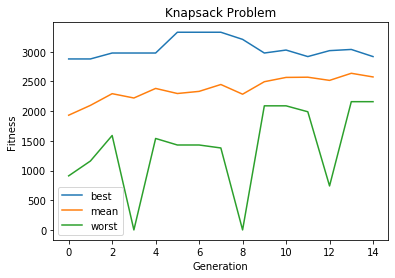

In [2]:
# Caso 1: Carreto

config = Config({
    'problem': {
    'type': ProblemType.MAXIMIZATION,                           # MINIMIZATION, MAXIMIZATION
    'values': [0, 1],
    'costs': [100, 350, 200, 90, 500, 250, 220, 360, 150, 700, 400, 230, 550],
    'weights': [50, 90, 30, 40, 100, 70, 20, 80, 80, 90, 50, 30, 70],
    'cargo': 600
    },
    'selection': {
        'strategy': SelectionStrategy.ROULETTE, # ROULETTE, TORNAMENT_BATTLE_ROYALE, or TOURNAMENT_PLAYOFF
    },
    'reproduction': {
        'strategy': ReproductionStrategy.SEXUAL_SINGLE_POINT,  # ASEXUAL, SEXUAL_SINGLE_POINT, SEXUAL_DOUBLE_POINTS
        'rate': 0.4
    },
    'mutation': {
        'strategy': MutationStrategy.FLIP,            # FLIP, SWAP, SEQUENCE_SWAP
        'rate': 0.1
    },
    'generation': {
        'strategy': GenerationStrategy.EXCHANGE,               # EXCHANGE, ELITISM, STEADY_STATE
        'population_size': 25,
    },
    'stop_criteria': {
        'num_generations': 10, #Used only on MAX_GENERATIONS and STEADY_PERIOD
        'type': StopCriteriaType.STEADY_PERIOD                 # MAX_GENERATION, MAX_FITNESS, CONVERGENCE, STEADY_PERIOD
        }
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

### 3.2.2. Problema da mochila. Como levar o máximo de valores dentro do peso suportado pela mochila?

Para este problema, foi imaginado a situação tradicional de uma mochila, mostrando como seria a modelagem e otimização.

Processing ...generating file1.txt for graphics and file2.txt for detailed population generations
[0, 0, 0, 0, 1, 0] 10
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 0] 10
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 1, 0, 0, 0, 1] 11
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16
[0, 0, 0, 0, 1, 1] 16

Best choice: 
[0, 0, 0, 0, 1, 1] - Fitness: 16 - Cost: 16 - Cargo: 20 - Generations at stop criteria: 11


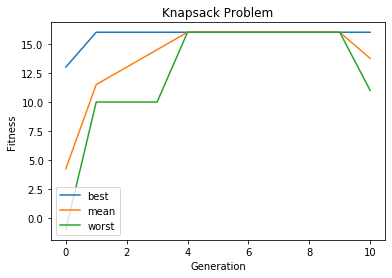

In [9]:
# Caso 2: Knapsack problem

# Knapsack maximum capabilityKnapsack
maxWeight=20

# Product List for Knapsack

config = Config({
    'problem': {
    'type': ProblemType.MAXIMIZATION,                           # MINIMIZATION, MAXIMIZATION
    'values': [0, 1],
    'costs': [3, 5, 4, 9, 10, 6],
    'weights': [7, 3, 8, 3, 9, 11],
    'cargo': 20
    },
    'selection': {
        'strategy': SelectionStrategy.ROULETTE  # ROULETTE, TORNAMENT_BATTLE_ROYALE, or TOURNAMENT_PLAYOFF
    },
    'reproduction': {
        'strategy': ReproductionStrategy.SEXUAL_SINGLE_POINT,   # ASEXUAL, SEXUAL_SINGLE_POINT, SEXUAL_DOUBLE_POINTS
        'rate': 0.4
    },
    'mutation': {
        'strategy': MutationStrategy.SEQUENCE_SWAP,            # FLIP, SWAP, SEQUENCE_SWAP
        'rate': 0.1
    },
    'generation': {
        'strategy': GenerationStrategy.EXCHANGE,               # EXCHANGE, ELITISM, STEADY_STATE
        'population_size': 4,
    },
    'stop_criteria': {
        #'fitness': 0, #Used only on MAX_FITNESS
        'num_generations': 10, #Used only on MAX_GENERATIONS and STEADY_PERIOD
        'type': StopCriteriaType.STEADY_PERIOD                 # MAX_GENERATION, MAX_FITNESS, CONVERGENCE, STEADY_PERIOD
        }
})

generationsResult = GeneticAlgorithmFacade(config).execute()

plot_fitness(generationsResult)

## 4.3 Avaliação de Desempenho

### 3.3.1 Tabela de Estratégias do Algoritmo Genético

|Notação|Estratégia|Tipo|Descrição|
|-------|--------|----|-----------|
|P1|Problem|MAXIMIZATION|Usado quando o objetivo do problema é otimizar para o máximo *fitness* possível|
|P2|Problem|MINIMIZATION|Usado quando o objetivo do problema é otimizar para o mínimo *fitness* possível|
|S1|Selection|TOURNAMENT_BATTLE_ROYALE|Torneio com toda a população, onde todos batalham contra o melhor indivíduo|
|S2|Selection|ROULETTE|Seleciona individuais aleatoriamente, fornecendo chances de reprodução ao *fittest*|
|S3|Selection|TOURNAMENT_PLAYOFF|Torneio com toda a população, onde todos batalham um contra um, em formato de *playoff* usando divisão e conquista|
|R1|Reproduction|ASEXUAL|Duplicação de cromossomos|
|R2|Reproduction|SEXUAL_SINGLE_POINT|Apenas um ponto de crossover|
|R3|Reproduction|SEXUAL_DOUBLE_POINTS|Dois pontos de crossover|
|M1|Mutation|FLIP|Muda o valor dos alelos de acordo com a taxa de mutação|
|M2|Mutation|SWAP|Dois alelos aleatórios se trocam de posição|
|M3|Mutation|SEQUENCE_SWAP|Um conjunto de alelos no cromossomos muda de ordem|
|G1|Generation|EXCHANGE|A população gerada substitui totalmente a anterior|
|G2|Generation|ELITISM|A população gerada substitui a anterior, com apenas o fittest da anterior|
|G3|Generation|STEADY_STATE|M <N individuais são gerados e o M substitui o pior M da população como um todo|
|X1|Stop Criteria|MAX_GENERATION|Parada por um determinado número de gerações|
|X2|Stop Criteria|MAX_FITNESS|Parada por um determinado fitness, usado quando já se sabe a resposta de solução do problema|
|X3|Stop Criteria|CONVERGENCE|Parada no período de estabilidade ou convergência, dado um quorum de indivíduos com o mesmo *fitness*|
|X4|Stop Criteria|STEADY_PERIOD|Parada no período de estabilidade ou convergência, por um determinado número de gerações|

### 3.3.2 Abreviações

|Abreviação|Significado|
|----------|-----------|
|MW|Capacidade em peso de um Objeto (maxWeight)|
|RR|Taxa de reprodução (Reproduction Rate or Crossover rate)|
|MR|Taxa de mutação (mutation rate)|
|PS|Tamanho da população inicial em número de cromossomos (population_size)|
|NG|Número de gerações dentro do período de estabilidade para critério de parada (num_generations)|

### 3.3.3 Experimentos

|Caso de Uso|MW|RR|MR|PS|NG|Estratégia|Fitness|Valor  |Peso   |Stop (Parada)|Comentário|
|-----------|--|--|--|--|--|----------|-------|-------|-------|-------------|----------|
|Carreto|600|80%|20%|25|10|P1, S1, R2, M3, G1, X4|3510|3510|560|19|Convergência não prematura|
|Carreto|600|40%|10%|25|10|P1, S1, R2, M3, G1, X4|3510|3510|590|22|Convergência não prematura|
|Carreto|600|80%|20%|25|10|P1, S3, R1, M3, G2, X4|3510|3510|590|22|Convergência não prematura|
|Carreto|600|80%|20%|25|10|P1, S2, R3, M3, G1, X4|3380|3380|580|24|Convergência não prematura|
|Carreto|600|80%|20%|25|10|P1, S2, R3, M1, G2, X4|3600|3600|600|22|Convergência não prematura|
|-----|---|---|---|--|--|----------------------|----|----|---|--|--------------------------|
|Mochila|20|80%|20%|4|10|P1, S1, R2, M3, G1, X4|24|24|15|18|Convergência não prematura|
|Mochila|20|40%|10%|4|10|P1, S1, R2, M3, G1, X4|16|16|20|11|Convergência prematura, overfit|
|Mochila|20|80%|20%|40|10|P1, S2, R3, M3, G1, X4|24|24|15|11|Convergência prematura, overfit|
|Mochila|20|80%|20%|4|10|P1, S2, R3, M3, G1, X4|24|24|15|23|Convergência não prematura|
|Mochila|20|80%|20%|4|10|P1, S2, R3, M1, G2, X4|24|24|15|14|Convergência prematura, overfit|

# 4. Conclusão
<p>A convergência, se prematura ou não, do valor do fitness depende de combinações das estratégias. Valores ótimos do fitness também depende de combinações das estratégias usadas. <p>
<p>A estratégia de seleção por roleta acaba não convergindo se toda a população for trocada a cada geração, precisando de pelo menos um indivíduo com melhor <i>fitness</i> para convergir adequadamente. No caso da seleção por torneio, como os melhores indivíduos já são escolhidos nela o critério para a geração da população se torna irrelevante para a convergência.<p>
<p>Em certos casos, o melhor indivíduo foi gerado em gerações anteriores a final, pois ele próprio pode sofrer uma mutação e piorar seu <i>score</i> de <i>fitness</i>, sendo ideal sempre armazenar o melhor indivíduo para não perder sua informação.</p>
<p>Aumentando o tamanho da população inicial, casos de convergência prematura ou <i>overfit</i> ocorrem com frequência, como mostrado no exemplo acima no caso da mochila, quando se aumentou o tamanho da população inicial de 4 para 40, a parada caiu de 23 para 10 gerações.<p>
<p>A melhor combinação é aquela que obtém o melhor <i>score</i> de <i>fitness</i> e dentro do peso máximo,  uma forma de também observar isso é verificar se o máximo de alelos do cromossomos estão preenchidos, como observado no exemplo de cargo com estratégia (P1, S2, R3, M1, G2, X4), onde a combinação [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] atingiu o melhor resultado, ou <i>best fit</i>. Caso a estratégia de parada fosse mudada de X4 para X1, todos os casos poderiam atingir a melhor combinação, mas em troca de uma menor performance, uma vez que seriam utilizadas um número menos otimizado para obter maior precisão.<p>
<p>Quando um caso de uso, como o caso do problema da mochila, tem cromossomo com número reduzido de alelos, e uma população reduzida, levam à uma rápida convergência para um mesmo <i>fitness</i>, apesar de estratégias distintas. Também casos de convergência prematura podem ocorrer com mais facilidade.<p>
<p>No caso do problema das cargas para um caminhão, que tem cromossomo com bastante alelos e uma população inicial grande de 25, a diminuição da taxa de reprodução e mutação pela metade (vide a estratégia P1, S1, R2, M3, G1, X4), o valor do fitness não é degradado. Não é o caso da mochila, que tem cromossomos com poucos alelos e uma população inicial pequena, a diminuição da taxa de reprodução e mutação pela metade, ocorre uma convergência prematura, com <i>overfit</i>, com valor fitness degradado. <p>

# 5. Referências
<ol>
<li>https://pt.wikipedia.org/wiki/Problema_da_mochila</li>
<li>https://www.youtube.com/watch?v=9kbzMeEBvUY</li>
    <li>https://github.com/edbkei/MO416PROJ2/tree/master/Project2</li>
</ol>

# 6. One Page Presentation

In [3]:
import os
os.startfile('knapsackProblemOnePage.pdf')

# 7. Informação de versões
### v1.0 Versão de entrega. Os alunos atuaram atuaram na elaboração do relatório no Jupyter notebok, modelamento e algoritmos de forma conjunta. Thales um pouco mais focado nos algoritmos e Eduardo um pouco mais focado na elaboração do relatório e modelamento.